<a href="https://colab.research.google.com/github/daegeunbae/daegeunbae/blob/main/2022_04_20%EC%9D%B8%EA%B5%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%B0%98_%EC%86%8C%EB%93%9D_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os       #운영체제 관련
import zipfile #압축 파일 처리 관련
from glob import glob
import sys

import warnings
warnings.filterwarnings(action='ignore')

#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

#분석 관련
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/02.coding/10.Team_Project/02.Dacon_인구소득예측/train.csv"
train=pd.read_csv(path)
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
path1 = "/content/drive/MyDrive/02.coding/10.Team_Project/02.Dacon_인구소득예측/test.csv"
test = pd.read_csv(path1)
test.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico


*데이터 수 확인

In [ ]:
# 데이터 차원 확인
print('train : ',train.shape)
print("test : ", test.shape)

train :  (17480, 16)
test :  (15081, 102)


In [ ]:
train.info()
#3컬럼 정도가 na가 있음을 알 수있다.
#그리고 가설에서 예상했던 것처럼, workclass가 na면 ocupation도 na일 가능성이 높아보인다. (백수예상)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [ ]:
train.isnull().sum()

id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [ ]:
# 데이터 차원 확인
print('train : ',train.shape)
print("test : ", test.shape)

train :  (17480, 16)
test :  (15081, 15)


In [ ]:
np.sum(test.isna())

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

# Data Preprocessing

In [ ]:
#컬럼명 변경 # . 이 있으면 분석시 오류가 생김 기존문자 대체
train.columns = train.columns.str.replace('.','_')
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
test.columns = test.columns.str.replace('.','_')

In [ ]:
#인덱스와 같으므로 삭제
del train['id']
del test['id']

In [ ]:
#임시 데이터로 작업하는게 편함
temp_train= train.copy()
temp_test= test.copy()

In [ ]:
label = train['capital_gain']
label.head()

0    0
1    0
2    0
3    0
4    0
Name: capital_gain, dtype: int64

In [ ]:
train.info()
#17480 entries 중 빠지는게 3개 정도 있고 전부 범주형이 빠져있네
# 범주형 / 수치형 데이터가 나눠지는군

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       15644 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education       17480 non-null  object
 4   education_num   17480 non-null  int64 
 5   marital_status  17480 non-null  object
 6   occupation      15637 non-null  object
 7   relationship    17480 non-null  object
 8   race            17480 non-null  object
 9   sex             17480 non-null  object
 10  capital_gain    17480 non-null  int64 
 11  capital_loss    17480 non-null  int64 
 12  hours_per_week  17480 non-null  int64 
 13  native_country  16897 non-null  object
 14  target          17480 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15081 non-null  int64 
 1   workclass       15081 non-null  object
 2   fnlwgt          15081 non-null  int64 
 3   education       15081 non-null  object
 4   education_num   15081 non-null  int64 
 5   marital_status  15081 non-null  object
 6   occupation      15081 non-null  object
 7   relationship    15081 non-null  object
 8   race            15081 non-null  object
 9   sex             15081 non-null  object
 10  capital_gain    15081 non-null  int64 
 11  capital_loss    15081 non-null  int64 
 12  hours_per_week  15081 non-null  int64 
 13  native_country  15081 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


In [ ]:
train['workclass'].value_counts()

Private             11568
Self-emp-not-inc     1272
Local-gov            1053
State-gov             659
Self-emp-inc          594
Federal-gov           485
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64

In [ ]:
test.shape

(15081, 14)

In [ ]:
train.count()

age               17480
workclass         15644
fnlwgt            17480
education         17480
education_num     17480
marital_status    17480
occupation        15637
relationship      17480
race              17480
sex               17480
capital_gain      17480
capital_loss      17480
hours_per_week    17480
native_country    16897
target            17480
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       15644 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education       17480 non-null  object
 4   education_num   17480 non-null  int64 
 5   marital_status  17480 non-null  object
 6   occupation      15637 non-null  object
 7   relationship    17480 non-null  object
 8   race            17480 non-null  object
 9   sex             17480 non-null  object
 10  capital_gain    17480 non-null  int64 
 11  capital_loss    17480 non-null  int64 
 12  hours_per_week  17480 non-null  int64 
 13  native_country  16897 non-null  object
 14  target          17480 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


In [ ]:
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
dtype: int64


### 0.해당 Null 값은 어떻게 대체할 것인가?
행 삭제? 중위수? 평균?

해당 컬럼의 성격에 맞게 결측치 대체가 이루어져야 함

범주형 데이터이기 때문에 중위수, 평균이 아니라 최빈값 기준으로 이루어져야 함

일 유형 / 직업의 경우, 나이 / 교육수준이 비슷한 사람들끼리 연봉 수준이나 업무의 유형이 비슷할 것으로 생각되기 때문에 비슷한 데이터들의 최빈값으로 대체 고려.

국적의 경우, 해당 컬럼이 데이터 분석에서 얼마나 유의미할지는 모르겠지만 국가별 소득 수준, 교육 수준이 평균적으로 다를 것으로 생각. 해당 데이터들의 최빈값 혹은 중위수로 대체

CPS weights에 대한 의미 체감이 잘 되지 않지만, 해당 데이터가 중요할 것으로 생각
결측치 전부가 범주형 데이터이기 때문에, 해당 데이터를 살펴보고 패턴이 없다면 제거하는 방법 고려

In [ ]:
train['occupation'].value_counts()

Exec-managerial      2113
Craft-repair         2101
Prof-specialty       2085
Adm-clerical         1893
Sales                1829
Other-service        1677
Machine-op-inspct    1040
Transport-moving      785
Handlers-cleaners     695
Farming-fishing       508
Tech-support          475
Protective-serv       350
Priv-house-serv        83
Armed-Forces            3
Name: occupation, dtype: int64

## 결측치 확인

In [ ]:
# 결측치가 있는 row들을 확인
train[train.isna().sum(axis=1) > 0]
#workclass 와 occupation이 같이 nall값 존재

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
15081,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
15082,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
15083,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,1
15084,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
15085,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


*이상치 확인(3개)

In [ ]:
train["target"].value_counts(normalize=True)

0    0.765103
1    0.234897
Name: target, dtype: float64

## EDA

0    13374
1     4106
Name: target, dtype: int64


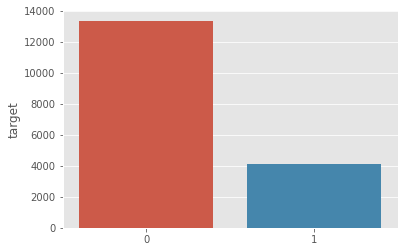

In [ ]:
#Target 분포 확인

tar_cnt = train['target'].value_counts()
print(tar_cnt)
sns.barplot(x=tar_cnt.index, y=tar_cnt)
#소득이 5만 이하인 데이터는 5만 이상 데이터의 3배 가량. 3:1의 비율

### 01.범주형 데이터 분석

In [ ]:
train["workclass"].value_counts(normalize=True) #비율이나 갯수로

Private             0.739453
Self-emp-not-inc    0.081309
Local-gov           0.067310
State-gov           0.042125
Self-emp-inc        0.037970
Federal-gov         0.031002
Never-worked        0.000447
Without-pay         0.000384
Name: workclass, dtype: float64

In [ ]:
train["occupation"].value_counts(normalize=True)

Exec-managerial      0.135128
Craft-repair         0.134361
Prof-specialty       0.133338
Adm-clerical         0.121059
Sales                0.116966
Other-service        0.107246
Machine-op-inspct    0.066509
Transport-moving     0.050201
Handlers-cleaners    0.044446
Farming-fishing      0.032487
Tech-support         0.030377
Protective-serv      0.022383
Priv-house-serv      0.005308
Armed-Forces         0.000192
Name: occupation, dtype: float64

In [ ]:
train["native_country"].value_counts(normalize=True)

United-States                 0.910990
Mexico                        0.021010
Philippines                   0.006392
Germany                       0.004439
Canada                        0.003728
Puerto-Rico                   0.003492
El-Salvador                   0.003433
Cuba                          0.002900
India                         0.002782
England                       0.002722
Jamaica                       0.002486
China                         0.002367
South                         0.002308
Italy                         0.002249
Dominican-Republic            0.002249
Columbia                      0.002190
Guatemala                     0.002131
Poland                        0.002071
Japan                         0.001953
Vietnam                       0.001894
Taiwan                        0.001657
Haiti                         0.001361
Nicaragua                     0.001184
Portugal                      0.001184
Ecuador                       0.001124
Ireland                  

In [ ]:
print(train['workclass'].unique())
print(train['occupation'].unique())
print(train['native_country'].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


In [ ]:
train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [ ]:
# 범주형 데이터 (수치형 데이터 drop)
train_cat = train.drop(['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss', 'hours_per_week'], axis=1)
train_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,0
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0


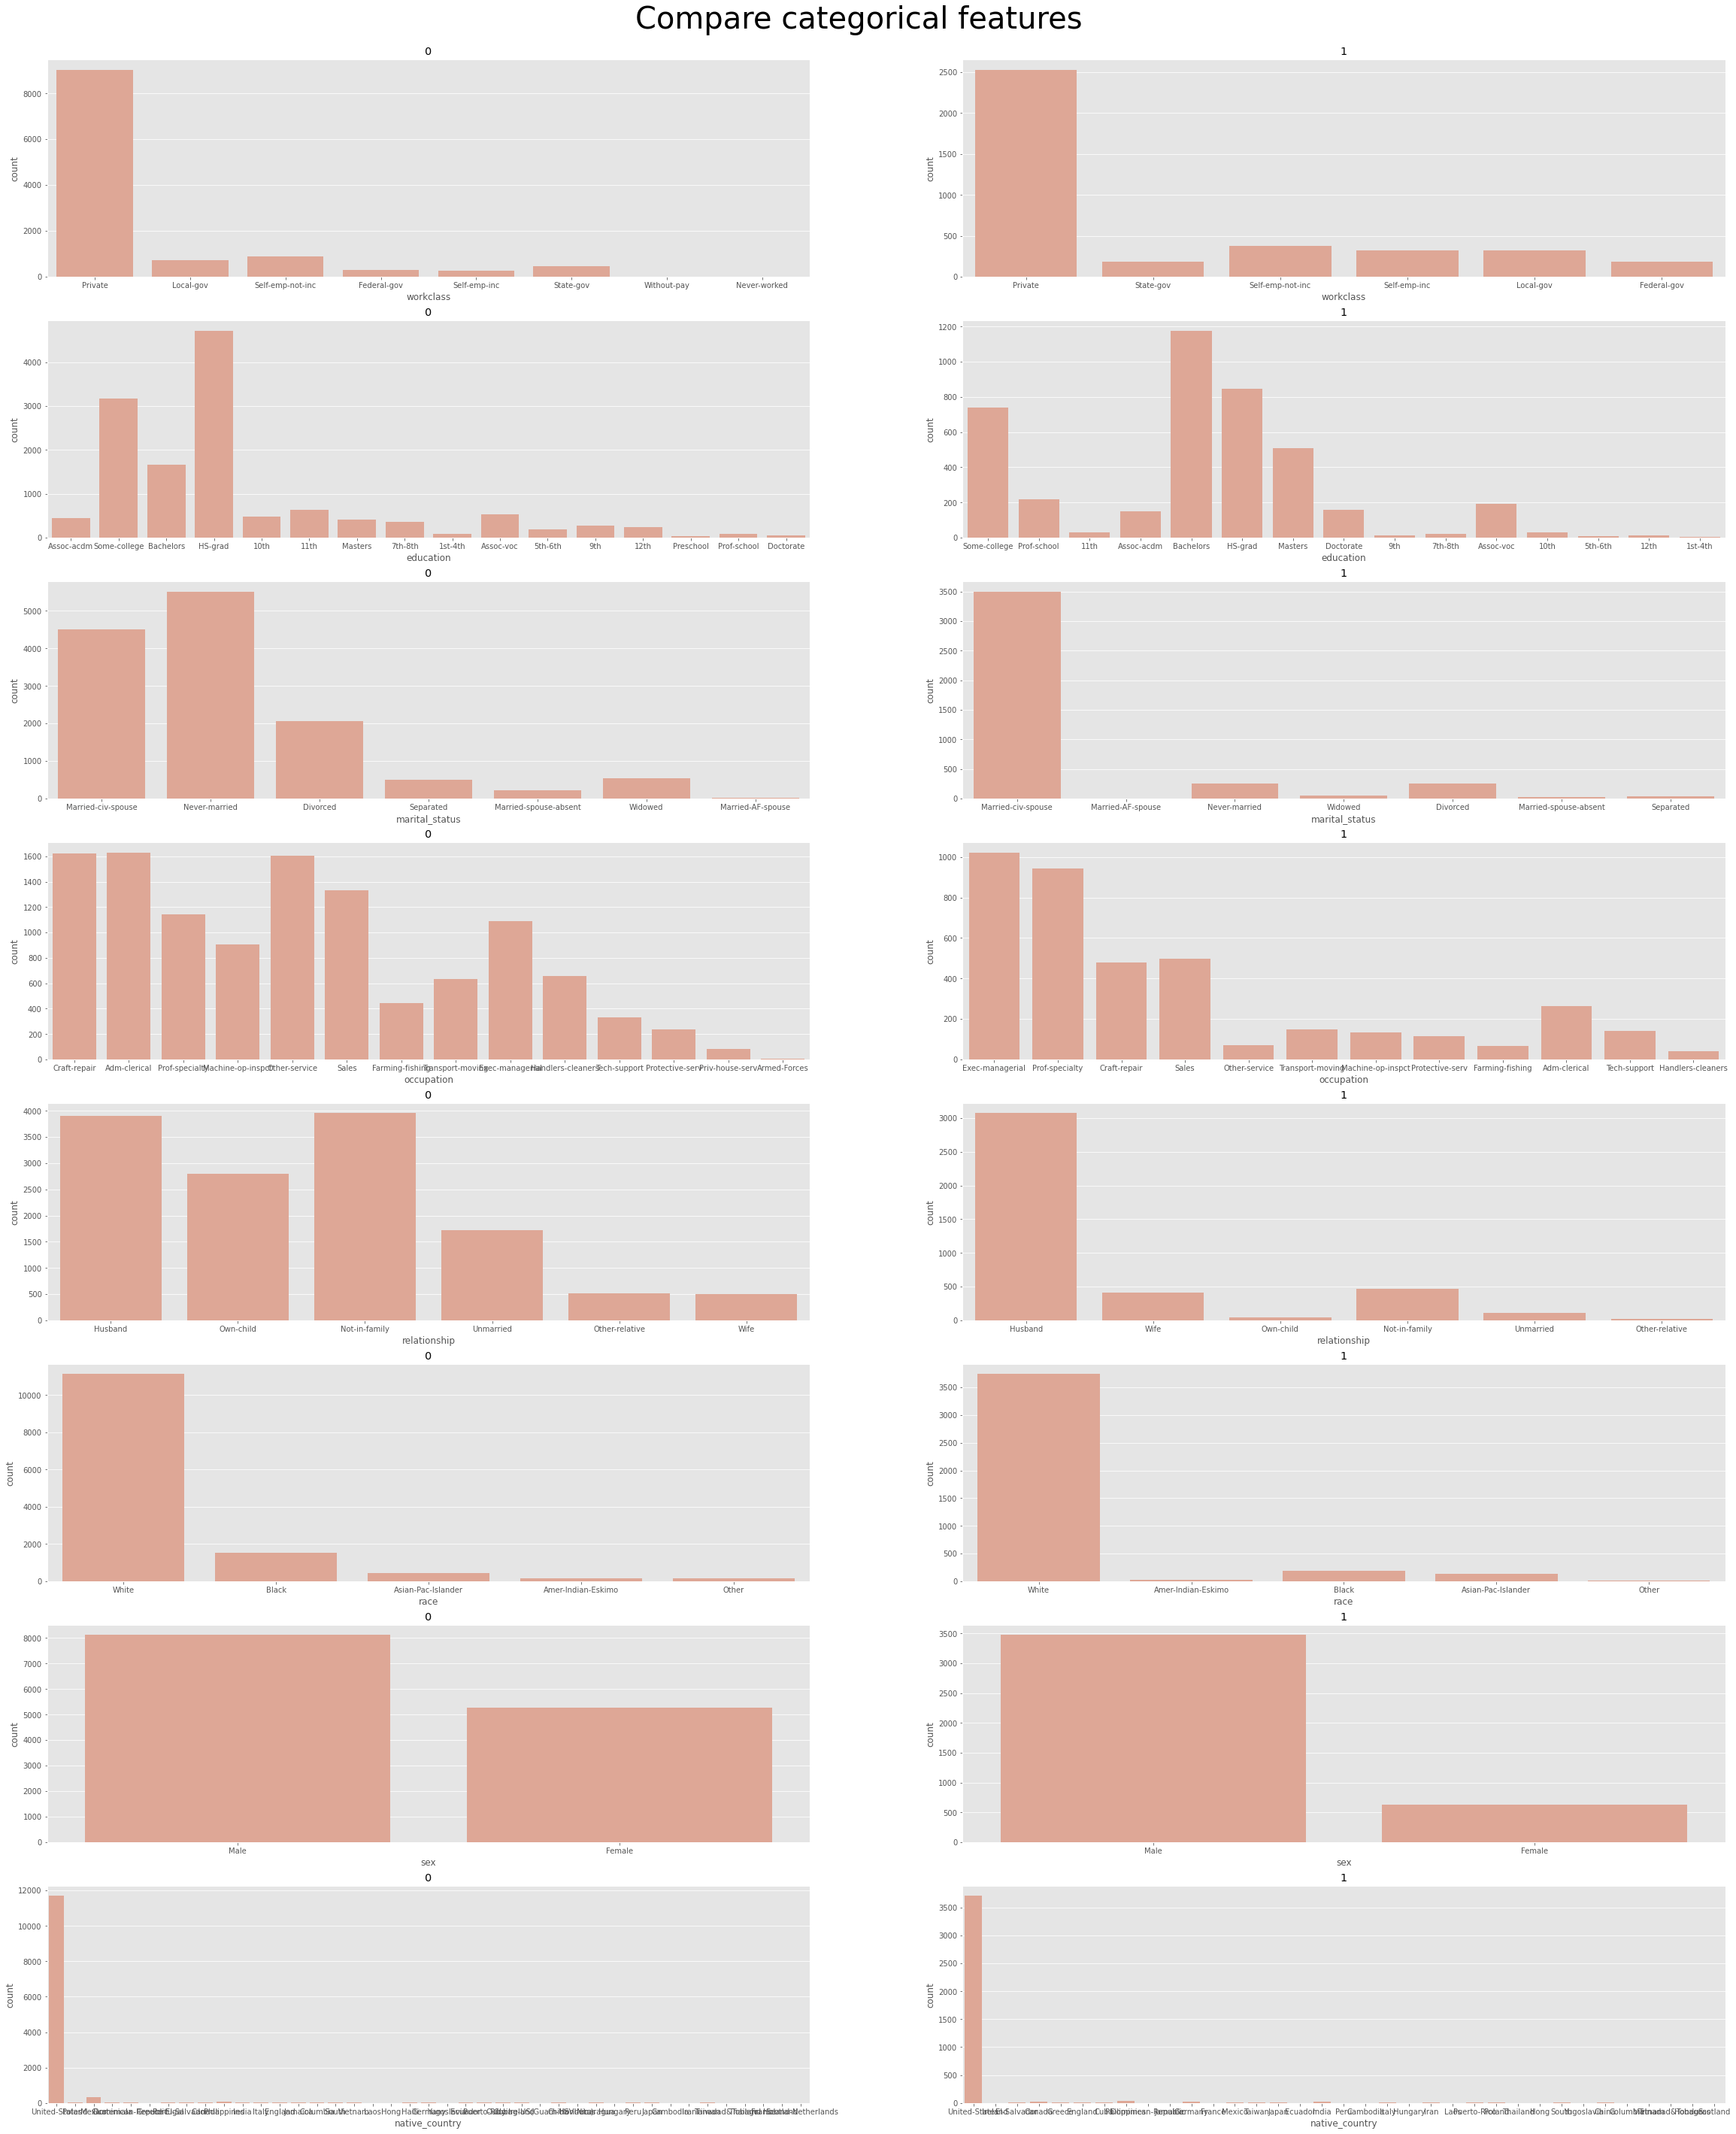

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 범주형 데이터 분포 확인
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(train_cat.columns[num], data= train_cat[train_cat['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_cat['target'].unique()[i], k)
        j = j+1
    k = k+1

5만 이하는 저소득 / 5만 이상은 고소득으로 간단히 명명

WorkClass
사기업 종사자가 대부분, 자영업, 지방, 주정부 순으로 많은 것을 확인

Education
저소득의 경우, 고졸 / 전문대 / 학사 순으로 많다
고소득의 경우, 학사 / 고졸 / 전문대 순으로 많음

->교육수준이 소득과 어느정도의 연관성이 있음을 반증

Marital Status
저소득의 경우, 미혼 / 기혼 / 이혼 순
고소득의 경우, 기혼 / 이혼 / 미혼 순

->소득이 결혼을 하는데 있어 중요한 선택지임을 나타내는 지표라는 생각이 든다

Occupation

저소득의 경우, Adm-clerical / Craft-repair / Other Service 순
고소득의 경우, Exec-managerial / Prof-specialty / Sales 순

->연봉이 높은 직업과 낮은 직업 별로 분포가 되어있다
Relationship

저소득의 경우, Husband / Not-in-family / Own-child 순
고소득의 경우, Husband / Not-in-family / Wife 순
해당 지표가 가족 관계에 있어 본인을 지칭하는 것인지, 정확히 파악 안 됨

Race
저소득의 경우, White / Black / Asian-Pac-Islander 순
고소득의 경우, White / Black / Asian-Pac-Islander 순

->고소득의 경우 타 지표에 비해 백인의 비중이 상당히 높고, 저소득의 경우 백인 이외의 지표 비중이 고소득보다 높은 양상을 보임

Sex
저소득의 경우, Male(약 7,000) / Female (약 4,500)
고소득의 경우, Male(약 3,300) / Female (약 500)

->데이터 건수 차이도 존재하겠지만, 비율로 보았을 때 고소득의 경우 남성의 비중이 훨씬 높은 양상을 보임

### 02.수치형 데이터 분석

In [ ]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target
count,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [ ]:
# 순자본이익 컬럼 생성
train['net_cap'] = train['capital_gain'] - train['capital_loss']

In [ ]:
train_num = train[['age', 'fnlwgt', 'net_cap', 'hours_per_week', 'target']] #수치형 피쳐와 label인 target 추출
train_num.head()

,age,fnlwgt,net_cap,hours_per_week,target
0,32,309513,0,40,0
1,33,205469,0,40,1
2,46,149949,0,40,0
3,23,193090,0,30,0
4,55,60193,0,40,0


In [ ]:
# net_cap의 최소, 최대값은 극명한데 사분위수들에 대한 정보가 나오지 않음
# 이상치가 존재하는지 확인 후, 이상치가 존재한다면 제거 작업 요망
train_num.describe()

,age,fnlwgt,net_cap,hours_per_week,target
count,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.000000
mean,38.720995,1.897610e+05,992.769908,40.002460,0.234897
std,14.079617,1.049929e+05,7462.144353,12.671265,0.423947
min,17.000000,1.228500e+04,-4356.000000,1.000000,0.000000
25%,27.000000,1.181558e+05,0.000000,38.000000,0.000000
50%,37.000000,1.781340e+05,0.000000,40.000000,0.000000
75%,48.000000,2.373180e+05,0.000000,45.000000,0.000000
max,90.000000,1.455435e+06,99999.000000,99.000000,1.000000


### 03.상관도 분석

In [ ]:
wc_cnt = train[['workclass', 'education_num', 'net_cap']]
# 일 유형별 교육수준, 순자본이익 평균을 계산
wc_cnt = wc_cnt.groupby('workclass').mean()
wc_cnt
#교육 수준이 높을수록 순자본 이익이 높은 추세에 있지만 꼭 비례하지는 않는다.
#의미적으로 보았을 때 Cap gain과 loss가 근로소득이 맞는지에 대한 의문점. 근로소득 이외 자본소득으로 이해한다면 소득 수준이 높기 때문에 굴릴 수 있는 케파가 커진다라고 생각되기 때문에 어느정도의 상관관계는 존재할 수 있다라고 판단

,education_num,net_cap
workclass,,
Federal-gov,10.985567,916.843299
Local-gov,11.003799,906.885090
Never-worked,7.428571,0.000000
Private,9.883904,843.034319
Self-emp-inc,11.040404,3931.102694
Self-emp-not-inc,10.213836,1900.728774
State-gov,11.427921,673.810319
Without-pay,8.666667,402.333333


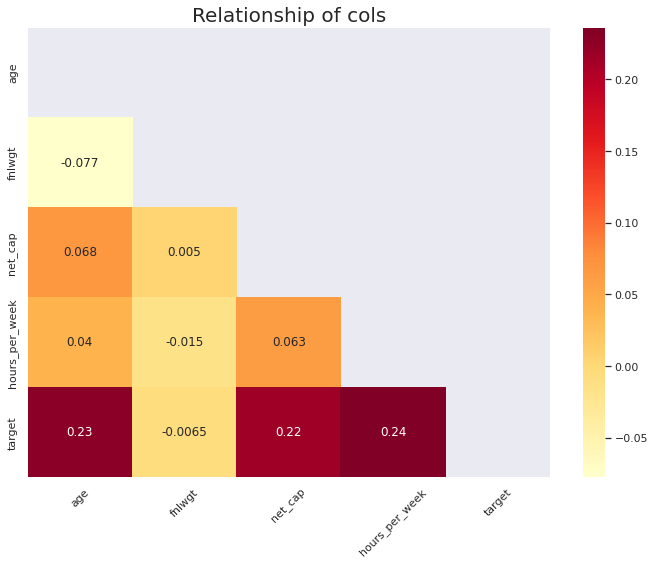

In [ ]:
import numpy as np

corr_df = train_num.corr()

# 사이즈 조정
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 절반만 표시하기 위한 mask 설정
mask=np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(corr_df,
                 annot=True, # 데이터 값 표시
                 mask=mask, # 마스크 적용 표시
                 cmap='YlOrRd') # 노랑 / 오렌지 / 빨강

plt.xticks(rotation=45)
plt.title('Relationship of cols', fontsize=20)
plt.show()

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico


## 전처리

In [ ]:
def preprocessing_train(df):


    # 일 유형별 교육수준, 순자본이익 평균 계산
    wc_cnt = df[['workclass', 'education_num', 'net_cap']]
    wc_cnt = wc_cnt.groupby('workclass').mean()

    # 결측치 일괄 제거
    df.dropna(inplace=True, axis=0)

    # 불용 columns 제거
    df.drop(['capital_gain', 'capital_loss'], inplace=True, axis=1)

    # columns 순서 변경
    df = df[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country', 'net_cap', 'target']]

    return df

def preprocessing_test(df):
    # 순자본이익 컬럼 생성
    df['net_cap'] = df['capital_gain'] - df['capital_loss']

    # 일 유형별 교육수준, 순자본이익 평균 계산
    wc_cnt = df[['workclass', 'education_num', 'net_cap']]
    wc_cnt = wc_cnt.groupby('workclass').mean()

    # 결측치 일괄 제거
    df.dropna(inplace=True, axis=0)

    # 불용 columns 제거
    df.drop(['capital_gain', 'capital_loss'], inplace=True, axis=1)


    return df

### 결측치 확인 / 제거

In [ ]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native_country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [ ]:
train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
net_cap              0
dtype: int64

결측치 제거

In [ ]:
temp_train['workclass'] == '?'

0        False
1        False
2        False
3        False
4        False
         ...  
17475    False
17476    False
17477    False
17478    False
17479    False
Name: workclass, Length: 17480, dtype: bool

In [ ]:
#가장 많이 나오는 값 mode()= 최빈값
temp_train['workclass'].mode()

0    Private
dtype: object

In [ ]:
temp_train['workclass'] == '?'

0        False
1        False
2        False
3        False
4        False
         ...  
17475    False
17476    False
17477    False
17478    False
17479    False
Name: workclass, Length: 17480, dtype: bool

In [ ]:
len(temp_train['workclass'] == '?')

17480

In [ ]:
has_na_columns = ['workclass','occupation','native_country']
has_na_columns

['workclass', 'occupation', 'native_country']

In [ ]:
(temp_train[has_na_columns] == '?').sum()

workclass         0
occupation        0
native_country    0
dtype: int64

In [ ]:
#값이 없는 애들을 최빈값으로 처리하겠다.
for c in has_na_columns:
    temp_train.loc[temp_train[c] =='?',c] =temp_train[c].mode()[0]
    temp_test.loc[temp_test[c] =='?',c] =temp_test[c].mode()[0]

In [ ]:
#제거 확인
(temp_train[has_na_columns] == '?').sum()

workclass         0
occupation        0
native_country    0
dtype: int64

In [ ]:
temp_train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
dtype: int64

결측치 제거2

In [ ]:
# 모두 데이터 값이 범주형이고 결측치들에 대해서 어떤 특별한 패턴은 보이지 않으므로 범주형 데이터에 대해서는 행을 삭제

def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

temp_train = handle_na(temp_train, missing_col)

# 결측치 처리가 잘 되었는지 확인
missing_col = check_missing_col(temp_train)

결측치가 존재하지 않습니다


### 05.log 함수 사용 -치우친 데이터 보정

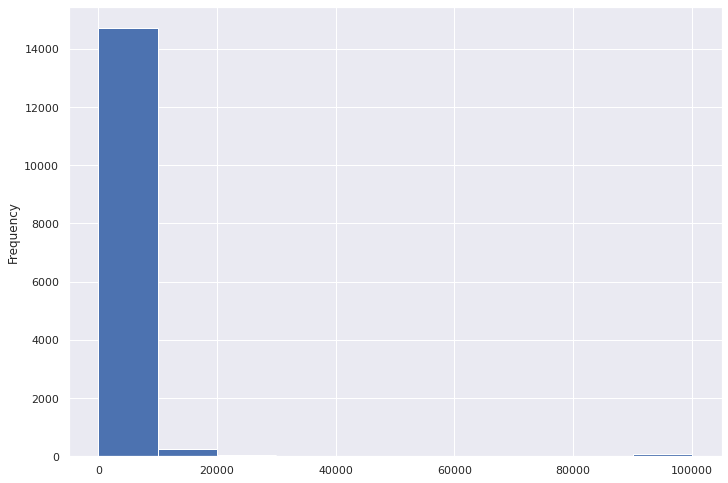

In [ ]:
temp_train['capital_gain'].plot.hist()
#분포도가 너무 치우쳐져 있음

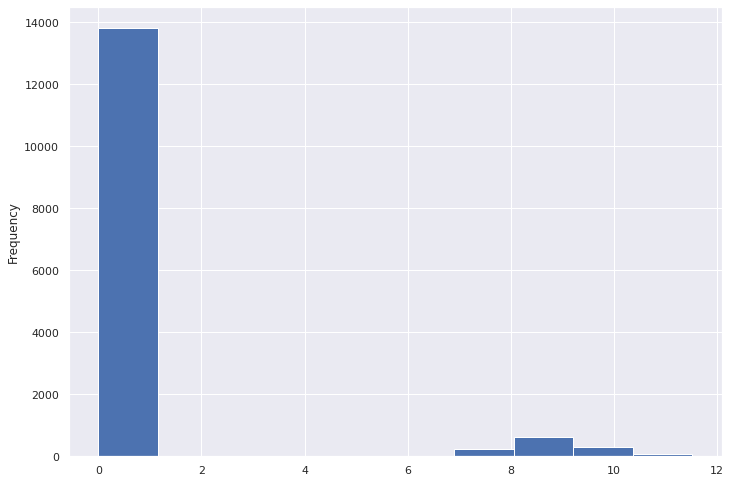

In [ ]:
temp_train['log_capital_gain'] = train['capital_gain'].map(lambda x: np.log(x) if x != 0 else 0)
temp_test['log_capital_gain'] = test['capital_gain'].map(lambda x: np.log(x) if x != 0 else 0)
temp_train['log_capital_gain'].plot.hist()

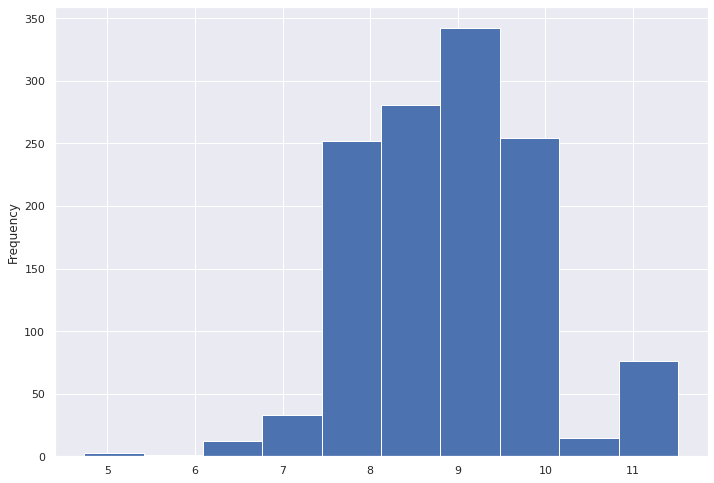

In [ ]:
# 0 이상 log_capital.gain 분포도 확인
temp_train[temp_train['log_capital_gain']>0]['log_capital_gain'].plot.hist()

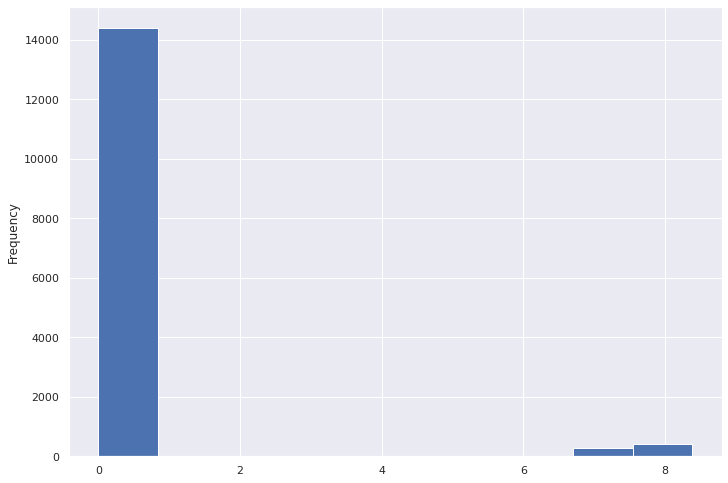

In [ ]:
temp_train['log_capital_loss'] = train['capital_loss'].map(lambda x: np.log(x) if x != 0 else 0)
temp_test['log_capital_loss'] = test['capital_loss'].map(lambda x: np.log(x) if x != 0 else 0)
temp_train['log_capital_loss'].plot.hist()

In [ ]:
temp_train = temp_train.drop(columns=['capital_loss','capital_gain'])
temp_test = temp_test.drop(columns=['capital_loss','capital_gain'])

In [ ]:
temp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,target,log_capital_gain,log_capital_loss
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,0,0.0,0.0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1,0.0,0.0
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,0,0.0,0.0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,30,United-States,0,0.0,0.0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,40,United-States,0,0.0,0.0


In [ ]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target,net_cap
0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0
1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,0
2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0
3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0,0
4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0,0


## Train, Valid, Test 학습
1.Train Data : 학습에 사용되는 데이터
2.Valid Data : 검증에 사용되는 데이터(Unseen Data)
3.Test Data : 예측 데이터

### 01.라벨인코딩
레이블 인코딩의 문제점

일괄적인 숫자 값으로 변환되면서 예측 성능이 떨어질 수 있다.

선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
(트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 괜찮음)


In [ ]:
label = label.map(lambda x: 1 if x == '>50k' else 0)

In [ ]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

temp_train = label_encoder(temp_train, make_label_map(temp_train))

### 02. One-hot Encoding

In [ ]:
temp_train = pd.get_dummies(temp_train)
temp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,target,log_capital_gain,log_capital_loss
0,32,0,309513,0,12,0,0,0,0,0,40,0,0,0.0,0.0
1,33,0,205469,1,10,0,1,0,0,0,40,0,1,0.0,0.0
2,46,0,149949,1,10,0,0,0,0,0,40,0,0,0.0,0.0
3,23,0,193090,2,13,1,2,1,0,1,30,0,0,0.0,0.0
4,55,0,60193,3,9,2,2,2,0,1,40,0,0,0.0,0.0


## 변수 및 모델 정리

### x 독립변수, 예측변수, 입력변수
y 종속변수 반응변수 출력변수

In [ ]:
X = temp_train.drop(['target'], axis=1)
y = temp_train['target']
print(X.shape, y.shape)

(15081, 14) (15081,)


In [ ]:
X_rob = temp_train.drop(['target'], axis=1)
y_rob = temp_train['target']
print(X_rob.shape, y_rob.shape)

(15081, 14) (15081,)


### 01.정규화 StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(X))
train_std = standardScaler.transform(X)

StandardScaler()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_std,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=42)

### 모델 성능 확인

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 선언
model_lgr = LogisticRegression(solver='liblinear', random_state=0)

# 모델 학습
model_lgr.fit(X_train, y_train)
pred = model_lgr.predict(X_valid)
score_lgr = accuracy_score(y_valid, pred)

print(f"LogisticRegression 모델의 정확도는 {score_lgr*100:.2f}% 입니다")

LogisticRegression 모델의 정확도는 82.53% 입니다


### 02.앙상블 모델 테스트

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore')

xgb_cfr = XGBClassifier(n_estimators=1000, random_state=0)
xgb_cfr.fit(X_train, y_train)

pred = xgb_cfr.predict(X_valid)
score_xgb = accuracy_score(y_valid, pred)
print(f'XGBClassifier Accuracy : {score_xgb*100:.2f}')

XGBClassifier Accuracy : 86.24


#### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_cfr = DecisionTreeClassifier(random_state=0)
dt_cfr.fit(X_train, y_train)

pred = dt_cfr.predict(X_valid)
score_dt = accuracy_score(y_valid, pred)
print(f'DecisionTreeClassifier Accuracy : {score_dt*100:.2f}')

DecisionTreeClassifier Accuracy : 80.21


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cfr = RandomForestClassifier(random_state=0)
rf_cfr.fit(X_train, y_train)

pred = rf_cfr.predict(X_valid)
score_rf = accuracy_score(y_valid, pred)
print(f'RandomForestClassifier Accuracy : {score_rf*100:.2f}')

RandomForestClassifier Accuracy : 85.25


#### SVC

In [ ]:
from sklearn.svm import SVC

svm_cfr = SVC(kernel="linear", probability=True, random_state=0)
svm_cfr.fit(X_train, y_train)

pred = svm_cfr.predict(X_valid)
score_svc = accuracy_score(y_valid, pred)
print(f'SoftVectorMachine Accuracy : {score_svc*100:.2f}')

SoftVectorMachine Accuracy : 82.47


#### GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbr_cfr = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

pred = gbr_cfr.predict(X_valid)
score_gbr = accuracy_score(y_valid, pred)
print(f'GradientBoostingClassifier Accuracy : {score_gbr*100:.2f}')

GradientBoostingClassifier Accuracy : 85.78


#### LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb_cfr = LGBMClassifier(n_estimators=1000, random_state=0)
lgb_cfr.fit(X_train, y_train)

pred = lgb_cfr.predict(X_valid)
score_lgb = accuracy_score(y_valid, pred)
print(f'LGBMClassifier Accuracy : {score_lgb*100:.2f}')

LGBMClassifier Accuracy : 85.12


#### KNeightborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_cfr = KNeighborsClassifier()
kn_cfr.fit(X_train, y_train)

pred = kn_cfr.predict(X_valid)
score_kn = accuracy_score(y_valid, pred)
print(f'KNeighborsClassifier Accuracy : {score_kn*100:.2f}')

KNeighborsClassifier Accuracy : 81.44


#### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_cfr = AdaBoostClassifier()
ab_cfr.fit(X_train, y_train)

pred = ab_cfr.predict(X_valid)
score_ab = accuracy_score(y_valid, pred)
print(f'AdaBoostClassifier Accuracy : {score_ab*100:.2f}')

AdaBoostClassifier Accuracy : 85.25


#### RidgeClassifier


In [ ]:
from sklearn.linear_model import RidgeClassifier

rd_cfr = RidgeClassifier(random_state=0,)
rd_cfr.fit(X_train, y_train)

pred = rd_cfr.predict(X_valid)
score_rd = accuracy_score(y_valid, pred)
print(f'RidgeClassifier Accuracy : {score_rd*100:.2f}')

RidgeClassifier Accuracy : 82.07


#### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bg_cfr = BaggingClassifier(random_state=0)
bg_cfr.fit(X_train, y_train)

pred = bg_cfr.predict(X_valid)
score_bg = accuracy_score(y_valid, pred)
print(f'BaggingClassifier Accuracy : {score_bg*100:.2f}')

BaggingClassifier Accuracy : 84.29


#### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_cfr = ExtraTreesClassifier(random_state=0)
et_cfr.fit(X_train, y_train)

pred = et_cfr.predict(X_valid)
score_et = accuracy_score(y_valid, pred)
print(f'ExtraTreesClassifier Accuracy : {score_et*100:.2f}')

ExtraTreesClassifier Accuracy : 84.29


### 모델 별 정확도

In [ ]:
model_lst = [model_lgr, xgb_cfr, dt_cfr, rf_cfr, svm_cfr, gbr_cfr, lgb_cfr, kn_cfr, ab_cfr, rd_cfr, bg_cfr, et_cfr]

for model in model_lst:
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    class_name = model.__class__.__name__
    print(f'{class_name} 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

LogisticRegression 정확도 : 82.53%
XGBClassifier 정확도 : 86.24%
DecisionTreeClassifier 정확도 : 80.21%
RandomForestClassifier 정확도 : 85.25%
SVC 정확도 : 82.47%
GradientBoostingClassifier 정확도 : 85.78%
LGBMClassifier 정확도 : 85.12%
KNeighborsClassifier 정확도 : 81.44%
AdaBoostClassifier 정확도 : 85.25%
RidgeClassifier 정확도 : 82.07%
BaggingClassifier 정확도 : 84.29%
ExtraTreesClassifier 정확도 : 84.29%


### Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_soft = VotingClassifier(estimators = [('LR', model_lgr),
                                            ('XGB', xgb_cfr),
                                            # ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            # ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            # ('LGBM', lgb_cfr),
                                            # ('KN', kn_cfr),
                                            ('AB', ab_cfr),],
                                            # ('RD', rd_cfr),
                                            # ('BG', bg_cfr),
                                            # ('ET', et_cfr)],
                                            voting='soft')
vo_cfr_soft.fit(X_train, y_train)
pred = vo_cfr_soft.predict(X_valid)
print(f'SoftVoting 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

SoftVoting 정확도 : 86.41%


In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_hard = VotingClassifier(estimators = [('LR', model_lgr),
                                            ('XGB', xgb_cfr),
                                            # ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            # ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            # ('LGBM', lgb_cfr),
                                            # ('KN', kn_cfr),
                                            ('AB', ab_cfr),],
                                            # ('RD', rd_cfr),
                                            # ('BG', bg_cfr),
                                            # ('ET', et_cfr)],
                                        voting='hard')
vo_cfr_hard.fit(X_train, y_train)
pred = vo_cfr_hard.predict(X_valid)
print(f'HardVoting 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')

HardVoting 정확도 : 86.11%


## Test 데이터에도 적용

In [ ]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15081 non-null  int64 
 1   workclass       15081 non-null  object
 2   fnlwgt          15081 non-null  int64 
 3   education       15081 non-null  object
 4   education_num   15081 non-null  int64 
 5   marital_status  15081 non-null  object
 6   occupation      15081 non-null  object
 7   relationship    15081 non-null  object
 8   race            15081 non-null  object
 9   sex             15081 non-null  object
 10  capital_gain    15081 non-null  int64 
 11  capital_loss    15081 non-null  int64 
 12  hours_per_week  15081 non-null  int64 
 13  native_country  15081 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


In [ ]:
test = preprocessing_test(test)
test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,net_cap
0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,0
1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,75,United-States,0
2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,40,United-States,8614
3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,55,United-States,0
4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,40,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,30,Local-gov,182926,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,15024
15077,39,Private,176101,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,0
15078,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,40,Puerto-Rico,0
15079,44,Private,100584,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,40,United-States,0


In [ ]:
temp_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,log_capital_gain,log_capital_loss
0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,0.000000,0.0
1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,75,United-States,0.000000,0.0
2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,40,United-States,9.061144,0.0
3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,55,United-States,0.000000,0.0
4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,40,Mexico,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,30,Local-gov,182926,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,9.617404,0.0
15077,39,Private,176101,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,0.000000,0.0
15078,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,40,Puerto-Rico,0.000000,0.0
15079,44,Private,100584,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,40,United-States,0.000000,0.0


In [ ]:
test = pd.get_dummies(test)
test.value_counts()

age  fnlwgt  education_num  hours_per_week  net_cap  workclass_Federal-gov  workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  education_10th  education_11th  education_12th  education_1st-4th  education_5th-6th  education_7th-8th  education_9th  education_Assoc-acdm  education_Assoc-voc  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Preschool  education_Prof-school  education_Some-college  marital_status_Divorced  marital_status_Married-AF-spouse  marital_status_Married-civ-spouse  marital_status_Married-spouse-absent  marital_status_Never-married  marital_status_Separated  marital_status_Widowed  occupation_Adm-clerical  occupation_Armed-Forces  occupation_Craft-repair  occupation_Exec-managerial  occupation_Farming-fishing  occupation_Handlers-cleaners  occupation_Machine-op-inspct  occupation_Other-service  occupation_Priv-house-serv  occupation_Prof-spec

### test StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(test))
test_standardScaled = standardScaler.transform(test)

test_std = pd.DataFrame(test_standardScaled, columns=test.columns)

StandardScaler()


In [ ]:
vo_cfr_soft = VotingClassifier(estimators = [('LR', model_lgr),
                                            ('XGB', xgb_cfr),
                                            # ('DT', dt_cfr),
                                            ('RF', rf_cfr),
                                            # ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),
                                            # ('LGBM', lgb_cfr),
                                            # ('KN', kn_cfr),
                                            ('AB', ab_cfr),],
                                            # ('RD', rd_cfr),
                                            # ('BG', bg_cfr),
                                            # ('ET', et_cfr)],
                                            voting='soft')
vo_cfr_soft.fit(X_train, y_train)
pred = vo_cfr_soft.predict(test_standardScaled)

ValueError: ignored

## 추론

In [ ]:
# csv형식으로 된 데이터 파일을 읽어옵니다.
test = pd.read_csv('/content/drive/MyDrive/02.coding/10.Team_Project/04.소비자 데이터 기반 소비 예측 경진대회/test.csv')
test.head()

In [ ]:
#마찬가지로 테스트 셋에서도 똑같이 전처리
test = label_encoder(test, make_label_map(test))
test.head()

In [ ]:
del test['id']

In [ ]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = model.predict(test)
prediction

## 제출

In [ ]:
# 제출용 Sample 파일을 불러옵니다
sample_submission = pd.read_csv('/content/drive/MyDrive/02.coding/10.Team_Project/04.소비자 데이터 기반 소비 예측 경진대회/sample_submission.csv')
sample_submission.to_csv('/content/drive/MyDrive/02.coding/10.Team_Project/04.소비자 데이터 기반 소비 예측 경진대회/sample_submission.csv',index = False)
sample_submission.head()